# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [23]:
# Import relevant libraries
from bs4 import BeautifulSoup as soup
from selenium import webdriver
import matplotlib.pyplot as plt
import pandas as pd
import chromedriver_autoinstaller
chromedriver_autoinstaller.install()

'/Users/jakepohs/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/chromedriver_autoinstaller/114/chromedriver'

In [24]:
driver = webdriver.Chrome()

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [25]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = ' https://static.bc-edx.com/data/web/mars_facts/temperature.html'
driver.get(url)

html = driver.page_source

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [26]:
# Create a Beautiful Soup Object
soup = soup(html, 'html.parser')

In [27]:
# Extract all rows of data
table = soup.find('table', class_='table')

headers_html = table.find_all('th')
headers = [header.text for header in headers_html]

rows = table.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [28]:
# Create an empty list
# Loop through the scraped data to create a list of rows
mars_temp_list = []
for row in rows:
    mars_temp_dict = {}
    row_data_html = row.find_all('td')
    row_data = [value.text for value in row_data_html]
    mars_temp_dict[headers[0]] = row_data[0] # ID
    mars_temp_dict[headers[1]] = row_data[1] # Terrestrial Date
    mars_temp_dict[headers[2]] = row_data[2] # Sol
    mars_temp_dict[headers[3]] = row_data[3] # ls
    mars_temp_dict[headers[4]] = row_data[4] # Month
    mars_temp_dict[headers[5]] = row_data[5] # Min_temp
    mars_temp_dict[headers[6]] = row_data[6] # Pressure
    mars_temp_list.append(mars_temp_dict)

mars_temp_list

[{'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '13',
  'terrestrial_date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 {'id': '24',
  'terrestrial_date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 {'id': '35',
  'terrestrial_date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 {'id': '46',
  'terrestrial_date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 {'id': '57',
  'terrestrial_date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 {'id': '68',
  'terrestrial_date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min_temp': '-77.0',
  'pressure': '740.0'},


In [29]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_temp_df = pd.DataFrame(mars_temp_list)

In [30]:
# Confirm DataFrame was created successfully
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [31]:
# Examine data type of each column
mars_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [32]:
# Change data types for data analysis
mars_temp_df['id'] = pd.to_numeric(mars_temp_df['id'])
mars_temp_df['terrestrial_date'] = pd.to_datetime(mars_temp_df['terrestrial_date'])
mars_temp_df['sol'] = pd.to_numeric(mars_temp_df['sol'])
mars_temp_df['ls'] = pd.to_numeric(mars_temp_df['ls'])
mars_temp_df['month'] = pd.to_numeric(mars_temp_df['month'])
mars_temp_df['min_temp'] = pd.to_numeric(mars_temp_df['min_temp'])
mars_temp_df['pressure'] = pd.to_numeric(mars_temp_df['pressure'])

In [33]:
# Confirm type changes were successful by examining data types again
mars_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [34]:
# 1. How many months are there on Mars?
mars_month_num = len(mars_temp_df['month'].unique())
print(f"There are {mars_month_num} months on mars.")

There are 12 months on mars.


In [35]:
# 2. How many Martian days' worth of data are there?
mars_day_num = mars_temp_df['sol'].count()
print(f"There are {mars_day_num} days worth of data.")

There are 1867 days worth of data.


In [36]:
# 3. What is the average low temperature by month?
mars_temp_by_month = mars_temp_df.groupby("month")
mars_months = mars_temp_by_month['month'].unique()
avg_temp_by_month = pd.DataFrame(mars_temp_by_month['min_temp'].mean())
avg_temp_by_month

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


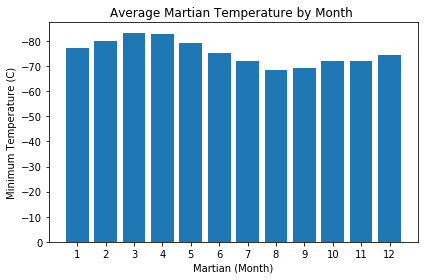

<Figure size 432x288 with 0 Axes>

In [37]:
# Plot the average temperature by month
fig1, ax1 = plt.subplots()

plt.bar(mars_months, avg_temp_by_month['min_temp'])

ax1.set_title("Average Martian Temperature by Month ")
ax1.set_xlabel("Martian (Month)")
ax1.set_xticks(range(1,13))
ax1.set_ylabel("Minimum Temperature (C)")
ax1.invert_yaxis()

fig1.tight_layout()
plt.savefig('Resources/temp_by_month.jpg')
plt.show()

In [38]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month =avg_temp_by_month[avg_temp_by_month['min_temp'] == (avg_temp_by_month['min_temp'].min())].index.values.astype(int)[0]
hottest_month =avg_temp_by_month[avg_temp_by_month['min_temp'] == (avg_temp_by_month['min_temp'].max())].index.values.astype(int)[0]
print(f"The coldest month was {coldest_month}, the warmest month was {hottest_month}")

The coldest month was 3, the warmest month was 8


In [39]:
# 4. Average pressure by Martian month
mars_pressure_by_month = pd.DataFrame(mars_temp_by_month['pressure'].mean())
mars_pressure_by_month.reset_index(inplace=True)
mars_pressure_by_month

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


In [40]:
lowest_pressure = mars_pressure_by_month['pressure'].min()
highest_pressure = mars_pressure_by_month['pressure'].max()

lowest_pressure_row = mars_pressure_by_month[mars_pressure_by_month['pressure'] == lowest_pressure]
highest_pressure_row = mars_pressure_by_month[mars_pressure_by_month['pressure'] == highest_pressure]

lowest_pressure_month = lowest_pressure_row['month'].values[0]
highest_pressure_month = highest_pressure_row['month'].values[0]

print(f"The highest pressure occured during the {highest_pressure_month} month and the lowest occured during {lowest_pressure_month} month.")

The highest pressure occured during the 9 month and the lowest occured during 6 month.


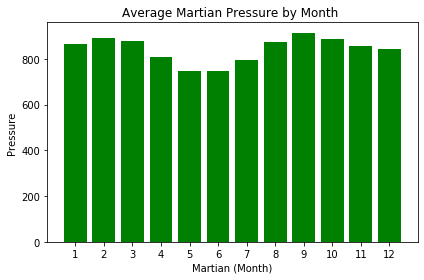

<Figure size 432x288 with 0 Axes>

In [41]:
# Plot the average pressure by month
fig2, ax2 = plt.subplots()

ax2.bar(mars_pressure_by_month['month'], mars_pressure_by_month['pressure'], color = 'green')
ax2.set_title("Average Martian Pressure by Month ")
ax2.set_xlabel("Martian (Month)")
ax2.set_xticks(mars_pressure_by_month['month'])
ax2.set_ylabel("Pressure")

fig2.tight_layout()
plt.savefig('Resources/pressure_by_month.jpg')
plt.show()

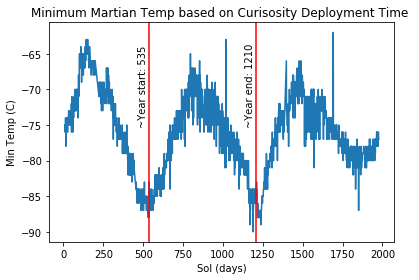

Based on the plot, one mars year is about 675 earth days.


<Figure size 432x288 with 0 Axes>

In [42]:
# 5. How many terrestrial (earth) days are there in a Martian year?
fig3, ax3 = plt.subplots()

ax3.plot(mars_temp_df['sol'], mars_temp_df['min_temp'])

ax3.set_title("Minimum Martian Temp based on Curisosity Deployment Time ")
ax3.set_xlabel("Sol (days)")
ax3.set_ylabel("Min Temp (C)")
ax3.text(470, -75, '~Year start: 535', rotation = 90)
ax3.axvline(x = 535, color = 'red')
ax3.text(1140, -75, '~Year end: 1210', rotation = 90)
ax3.axvline(x = 1210, color = 'red')

fig3.tight_layout()
plt.savefig('Resources/daily_temp.jpg')
plt.show()

mars_year = 1210 - 535

print(f"Based on the plot, one mars year is about {mars_year} earth days.")

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [43]:
# Write the data to a CSV
mars_temp_df.to_csv('Resources/mars_temp_pressure.csv')

In [44]:
driver.quit()